<a href="https://colab.research.google.com/github/jiuyuanx/94812/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
from torch.nn.functional import softmax
import torch
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ", device)

Device:  cpu


In [14]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/94812/hw1/bbc_sentiment_ner.csv')
df

,Unnamed: 0.1,Unnamed: 0,topic,content,sentiment,score,ner,CARDINAL,DATE,EVENT,...,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART
0,0,0,business,Golden rule 'intact' says ex-aide\n\nChancello...,Negative,0.003080,"[('Gordon Brown', 'PERSON'), (""Mr Brown's"", 'O...",1,5,0,...,0,0,0,15,0,6,0,0,0,1
1,1,1,business,Beer giant swallows Russian firm\n\nBrewing gi...,Neutral,0.687573,"[('Russian', 'NORP'), ('Inbev', 'ORG'), (""Alfa...",7,3,0,...,2,6,1,12,2,6,2,0,0,0
2,2,2,business,Deutsche Boerse set to 'woo' LSE\n\nBosses of ...,Negative,0.000259,"[('Deutsche Boerse', 'ORG'), ('Deutsche Boerse...",1,8,0,...,3,3,2,13,0,9,0,0,0,0
3,3,3,business,GM in crunch talks on Fiat future\n\nFiat will...,Negative,0.001180,"[('GM', 'ORG'), ('Fiat', 'ORG'), ('Fiat', 'ORG...",1,6,0,...,0,2,0,29,4,4,0,0,0,0
4,4,4,business,Sluggish economy hits German jobs\n\nThe numbe...,Negative,0.000155,"[('German', 'NORP'), ('Europe', 'LOC'), ('the ...",3,5,0,...,0,3,0,2,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2220,2220,tech,Fast moving phone viruses appear\n\nSecurity f...,Negative,0.000176,"[('Cabir', 'ORG'), ('Cabir', 'GPE'), ('the Sym...",5,2,1,...,0,4,0,11,0,0,1,0,0,0
2221,2221,2221,tech,Musical future for phones\n\nAnalyst Bill Thom...,Positive,0.961024,"[('Bill Thompson', 'PERSON'), ('Max', 'PERSON'...",11,2,0,...,0,1,0,11,0,7,2,0,0,1
2222,2222,2222,tech,'No re-draft' for EU patent law\n\nA proposed ...,Negative,0.000900,"[('EU', 'ORG'), ('European', 'NORP'), ('the Eu...",1,4,0,...,0,2,1,17,0,3,0,0,0,0
2223,2223,2223,tech,Apple sues 'Tiger' file sharers\n\nApple has t...,Negative,0.000158,"[('Apple', 'ORG'), ('Apple', 'ORG'), ('three',...",2,9,0,...,0,0,1,15,0,2,0,0,0,0


In [4]:
from gensim import corpora
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# %%
def preprocess_text(doc):
    # Tokenize, remove stopwords, and lowercase
    stop_words = set(stopwords.words('english'))
    return [word for word in gensim.utils.simple_preprocess(doc) if word not in stop_words]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
import gensim
df['processed_docs'] = df['content'].map(preprocess_text)
dictionary = corpora.Dictionary(df['processed_docs'])
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in df['processed_docs']]

In [16]:
# Set up the LDA model
lda_model = gensim.models.LdaMulticore(corpus, num_topics=20, id2word=dictionary, passes=10, workers=2)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.016*"india" + 0.014*"oil" + 0.010*"bn" + 0.009*"prices" + 0.008*"indian" + 0.008*"government" + 0.007*"market" + 0.007*"company" + 0.007*"energy" + 0.007*"us"
Topic: 1 
Words: 0.020*"ferguson" + 0.019*"arsenal" + 0.010*"henry" + 0.010*"mr" + 0.010*"scottish" + 0.009*"world" + 0.007*"united" + 0.007*"shot" + 0.007*"meeting" + 0.007*"france"
Topic: 2 
Words: 0.049*"film" + 0.022*"best" + 0.014*"films" + 0.012*"director" + 0.012*"actor" + 0.010*"awards" + 0.010*"oscar" + 0.009*"actress" + 0.008*"award" + 0.008*"dvd"
Topic: 3 
Words: 0.015*"government" + 0.010*"world" + 0.008*"aid" + 0.008*"countries" + 0.007*"people" + 0.007*"mr" + 0.006*"lord" + 0.006*"could" + 0.006*"international" + 0.005*"debt"
Topic: 4 
Words: 0.015*"us" + 0.014*"economy" + 0.013*"growth" + 0.011*"economic" + 0.010*"bn" + 0.007*"market" + 0.007*"dollar" + 0.007*"bank" + 0.006*"rate" + 0.006*"rise"
Topic: 5 
Words: 0.011*"people" + 0.011*"world" + 0.010*"olympic" + 0.010*"education" + 0.009*"indoor"

In [17]:
import warnings
warnings.filterwarnings('ignore')
from tqdm.auto import tqdm
def format_topics_sentences(ldamodel, corpus):
    topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in tqdm(enumerate(ldamodel[corpus])):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics_df = topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    return topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)
df = pd.concat([df.reset_index(drop=True), df_topic_sents_keywords.reset_index(drop=True)], axis=1)
df

0it [00:00, ?it/s]

,Unnamed: 0.1,Unnamed: 0,topic,content,sentiment,score,ner,CARDINAL,DATE,EVENT,...,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,processed_docs,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,0,0,business,Golden rule 'intact' says ex-aide\n\nChancello...,Negative,0.003080,"[('Gordon Brown', 'PERSON'), (""Mr Brown's"", 'O...",1,5,0,...,0,6,0,0,0,1,"[golden, rule, intact, says, ex, aide, chancel...",18,0.6512,"mr, labour, election, party, blair, brown, min..."
1,1,1,business,Beer giant swallows Russian firm\n\nBrewing gi...,Neutral,0.687573,"[('Russian', 'NORP'), ('Inbev', 'ORG'), (""Alfa...",7,3,0,...,2,6,2,0,0,0,"[beer, giant, swallows, russian, firm, brewing...",10,0.4596,"bn, sales, firm, company, uk, companies, busin..."
2,2,2,business,Deutsche Boerse set to 'woo' LSE\n\nBosses of ...,Negative,0.000259,"[('Deutsche Boerse', 'ORG'), ('Deutsche Boerse...",1,8,0,...,0,9,0,0,0,0,"[deutsche, boerse, set, woo, lse, bosses, deut...",16,0.6447,"club, united, bid, offer, mr, board, football,..."
3,3,3,business,GM in crunch talks on Fiat future\n\nFiat will...,Negative,0.001180,"[('GM', 'ORG'), ('Fiat', 'ORG'), ('Fiat', 'ORG...",1,6,0,...,4,4,0,0,0,0,"[gm, crunch, talks, fiat, future, fiat, meet, ...",10,0.4493,"bn, sales, firm, company, uk, companies, busin..."
4,4,4,business,Sluggish economy hits German jobs\n\nThe numbe...,Negative,0.000155,"[('German', 'NORP'), ('Europe', 'LOC'), ('the ...",3,5,0,...,3,3,0,0,0,0,"[sluggish, economy, hits, german, jobs, number...",4,0.9081,"us, economy, growth, economic, bn, market, dol..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,2220,2220,tech,Fast moving phone viruses appear\n\nSecurity f...,Negative,0.000176,"[('Cabir', 'ORG'), ('Cabir', 'GPE'), ('the Sym...",5,2,1,...,0,0,1,0,0,0,"[fast, moving, phone, viruses, appear, securit...",11,0.9525,"users, software, people, net, security, micros..."
2221,2221,2221,tech,Musical future for phones\n\nAnalyst Bill Thom...,Positive,0.961024,"[('Bill Thompson', 'PERSON'), ('Max', 'PERSON'...",11,2,0,...,0,7,2,0,0,1,"[musical, future, phones, analyst, bill, thomp...",19,0.9974,"people, technology, digital, mobile, tv, could..."
2222,2222,2222,tech,'No re-draft' for EU patent law\n\nA proposed ...,Negative,0.000900,"[('EU', 'ORG'), ('European', 'NORP'), ('the Eu...",1,4,0,...,0,3,0,0,0,0,"[draft, eu, patent, law, proposed, european, l...",12,0.9939,"government, new, council, could, law, legal, l..."
2223,2223,2223,tech,Apple sues 'Tiger' file sharers\n\nApple has t...,Negative,0.000158,"[('Apple', 'ORG'), ('Apple', 'ORG'), ('three',...",2,9,0,...,0,2,0,0,0,0,"[apple, sues, tiger, file, sharers, apple, tak...",11,0.6783,"users, software, people, net, security, micros..."


In [27]:
topic_list = list(df[['Dominant_Topic','Topic_Keywords']].value_counts().index.values)
topic_list = sorted(topic_list, key=lambda x:x[0])
topic_list = [i[1] for i in topic_list]
topic_list

['india, oil, bn, prices, indian, government, market, company, energy, us',
 'ferguson, arsenal, henry, mr, scottish, world, united, shot, meeting, france',
 'film, best, films, director, actor, awards, oscar, actress, award, dvd',
 'government, world, aid, countries, people, mr, lord, could, international, debt',
 'us, economy, growth, economic, bn, market, dollar, bank, rate, rise',
 'people, world, olympic, education, indoor, european, schools, students, race, british',
 'us, mr, yukos, court, bn, company, russian, fraud, firm, legal',
 'games, game, gaming, mr, gamers, xbox, people, software, time, titles',
 'film, festival, public, workers, dutch, government, choice, day, life, february',
 'mr, home, rights, government, law, human, trial, told, secretary, without',
 'bn, sales, firm, company, uk, companies, business, profits, new, people',
 'users, software, people, net, security, microsoft, use, mail, virus, many',
 'government, new, council, could, law, legal, lord, airline, may

In [30]:
df_topic_sentiment=df[['score', 'Dominant_Topic']].groupby('Dominant_Topic').mean().reset_index()
df_topic_sentiment['Topic'] = topic_list
df_topic_sentiment

,Dominant_Topic,score,Topic
0,0,0.150292,"india, oil, bn, prices, indian, government, ma..."
1,1,0.271478,"ferguson, arsenal, henry, mr, scottish, world,..."
2,2,0.768828,"film, best, films, director, actor, awards, os..."
3,3,0.079970,"government, world, aid, countries, people, mr,..."
4,4,0.074410,"us, economy, growth, economic, bn, market, dol..."
5,5,0.413270,"people, world, olympic, education, indoor, eur..."
6,6,0.031563,"us, mr, yukos, court, bn, company, russian, fr..."
7,7,0.492354,"games, game, gaming, mr, gamers, xbox, people,..."
8,8,0.471171,"film, festival, public, workers, dutch, govern..."
9,9,0.004017,"mr, home, rights, government, law, human, tria..."


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'film, best, films, director, actor, awards, oscar, actress, award, dvd'),
  Text(1, 0, 'music, best, show, one, new, us, band, number, first, uk'),
  Text(2, 0, 'game, first, england, win, time, one, two, back, last, play'),
  Text(3, 0, 'people, technology, digital, mobile, tv, could, music, one, new, like'),
  Text(4, 0, 'games, game, gaming, mr, gamers, xbox, people, software, time, titles'),
  Text(5, 0, 'film, festival, public, workers, dutch, government, choice, day, life, february'),
  Text(6, 0, 'people, world, olympic, education, indoor, european, schools, students, race, british'),
  Text(7, 0, 'users, software, people, net, security, microsoft, use, mail, virus, many'),
  Text(8, 0, 'ferguson, arsenal, henry, mr, scottish, world, united, shot, meeting, france'),
  Text(9, 0, 'india, oil, bn, prices, indian, government, market, company, energy, us'),
  Text(10, 0, 'bn, sales, firm, company,

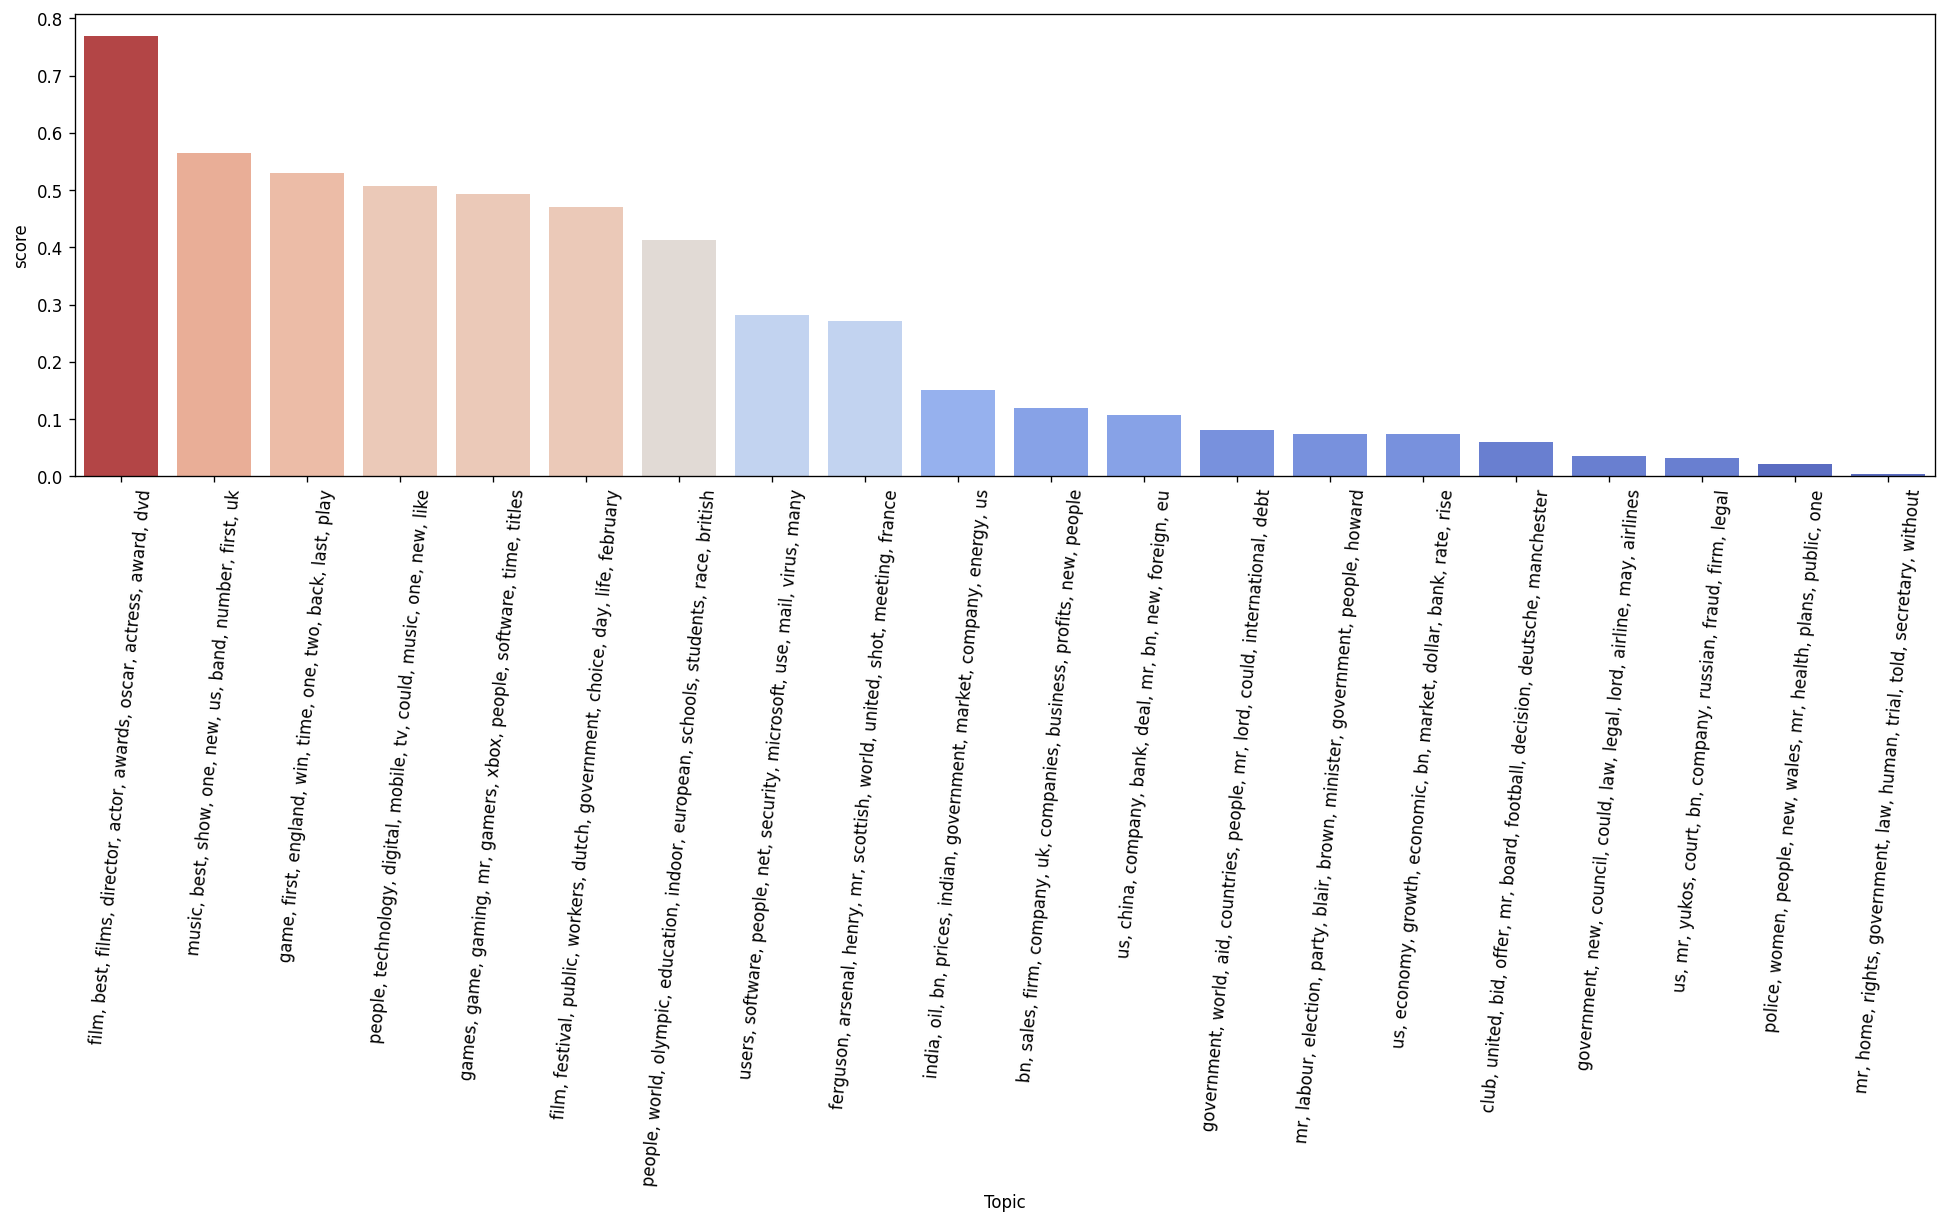

In [64]:

def colors_from_values(values, palette_name):
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

plt.figure(figsize=(20,5), dpi=120)
dff=df_topic_sentiment.sort_values('score', ascending=False)
sns.barplot(dff, x='Topic',y='score', palette=colors_from_values(dff['score'].values, "coolwarm"))
plt.xticks(rotation=85)

We can see from the plot that the topic (2, 0, 'film, best, films, director, actor, awards, oscar, actress, award, dvd') has the highest sentiment score, and the topic \
(15, 0, 'music, best, show, one, new, us, band, number, first, uk'), \
(17, 0, 'game, first, england, win, time, one, two, back, last, play'), \
(19, 0, 'people, technology, digital, mobile, tv, could, music, one, new, like') \
also have very high sentiment score.\
The topic (9, 0, 'mr, home, rights, government, law, human, trial, told, secretary, without') has the most negative sentiment.
And the topics \
(6, 0, 'us, mr, yukos, court, bn, company, russian, fraud, firm, legal'), \
(13, 0, 'police, women, people, new, wales, mr, health, plans, public, one') \
(12, 0, 'government, new, council, could, law, legal, lord, airline, may, airlines') \
also have very low sentiment score.




In [40]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'topic', 'content', 'sentiment', 'score',
       'ner', 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW',
       'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON',
       'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART', 'processed_docs',
       'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'],
      dtype='object')

In [53]:
df_topic_ner_sentiment = df[['CARDINAL', 'score','DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW',
       'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON',
       'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART', 'Dominant_Topic']].groupby('Dominant_Topic').mean().reset_index()
df_topic_ner_sentiment = df_topic_ner_sentiment.sort_values('score')
df_topic_ner_sentiment

,Dominant_Topic,CARDINAL,score,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART
9,9,2.629630,0.004017,5.629630,0.074074,0.351852,5.814815,0.018519,0.166667,0.537037,0.759259,3.037037,0.537037,8.018519,0.148148,11.055556,0.259259,0.018519,0.388889,0.240741
13,13,3.389610,0.021554,5.675325,0.246753,0.259740,4.701299,0.025974,0.220779,0.220779,0.480519,1.896104,0.454545,7.103896,0.467532,7.948052,0.116883,0.025974,0.376623,0.259740
6,6,2.750000,0.031563,4.766667,0.100000,0.083333,7.233333,0.016667,0.350000,0.150000,2.316667,2.233333,0.550000,10.166667,0.483333,10.383333,0.083333,0.033333,0.066667,0.050000
12,12,3.312500,0.035178,4.812500,0.171875,0.343750,4.062500,0.015625,0.109375,0.343750,1.062500,1.984375,0.718750,8.968750,0.609375,5.625000,0.203125,0.125000,0.093750,0.234375
16,16,2.029851,0.060588,5.716418,0.656716,0.238806,5.298507,0.029851,0.014925,0.268657,1.567164,1.835821,0.328358,9.179104,0.582090,10.820896,0.194030,0.014925,0.149254,0.029851
4,4,2.826667,0.074410,11.053333,0.066667,0.053333,6.620000,0.013333,0.000000,0.640000,1.973333,1.980000,0.526667,6.733333,4.140000,3.213333,0.086667,0.026667,0.186667,0.093333
18,18,2.377990,0.074526,5.076555,0.215311,0.191388,3.909091,0.062201,0.047847,0.622010,0.741627,4.258373,0.889952,9.296651,0.497608,12.277512,0.143541,0.014354,0.172249,0.306220
3,3,2.823529,0.079970,5.215686,0.176471,0.235294,6.117647,0.039216,0.137255,1.058824,1.000000,2.117647,0.784314,7.470588,1.019608,6.980392,0.784314,0.058824,0.274510,0.196078
14,14,3.103093,0.106886,4.742268,0.072165,0.164948,9.268041,0.000000,0.092784,0.659794,2.484536,2.731959,0.577320,11.092784,0.989691,4.474227,0.206186,0.144330,0.103093,0.072165
10,10,3.621622,0.119677,6.810811,0.072072,0.072072,4.342342,0.009009,0.072072,0.612613,3.477477,1.324324,0.603604,11.072072,2.180180,4.270270,0.369369,0.063063,0.315315,0.108108


,Dominant_Topic,Name,Value
0,"mr, home, rights, government, law, human, tria...",CARDINAL,2.629630
1,"police, women, people, new, wales, mr, health,...",CARDINAL,3.389610
2,"us, mr, yukos, court, bn, company, russian, fr...",CARDINAL,2.750000
3,"government, new, council, could, law, legal, l...",CARDINAL,3.312500
4,"club, united, bid, offer, mr, board, football,...",CARDINAL,2.029851
...,...,...,...
355,"games, game, gaming, mr, gamers, xbox, people,...",WORK_OF_ART,0.250000
356,"people, technology, digital, mobile, tv, could...",WORK_OF_ART,0.206731
357,"game, first, england, win, time, one, two, bac...",WORK_OF_ART,0.260870
358,"music, best, show, one, new, us, band, number,...",WORK_OF_ART,1.117155


Text(0, 0.5, 'NER numbers')

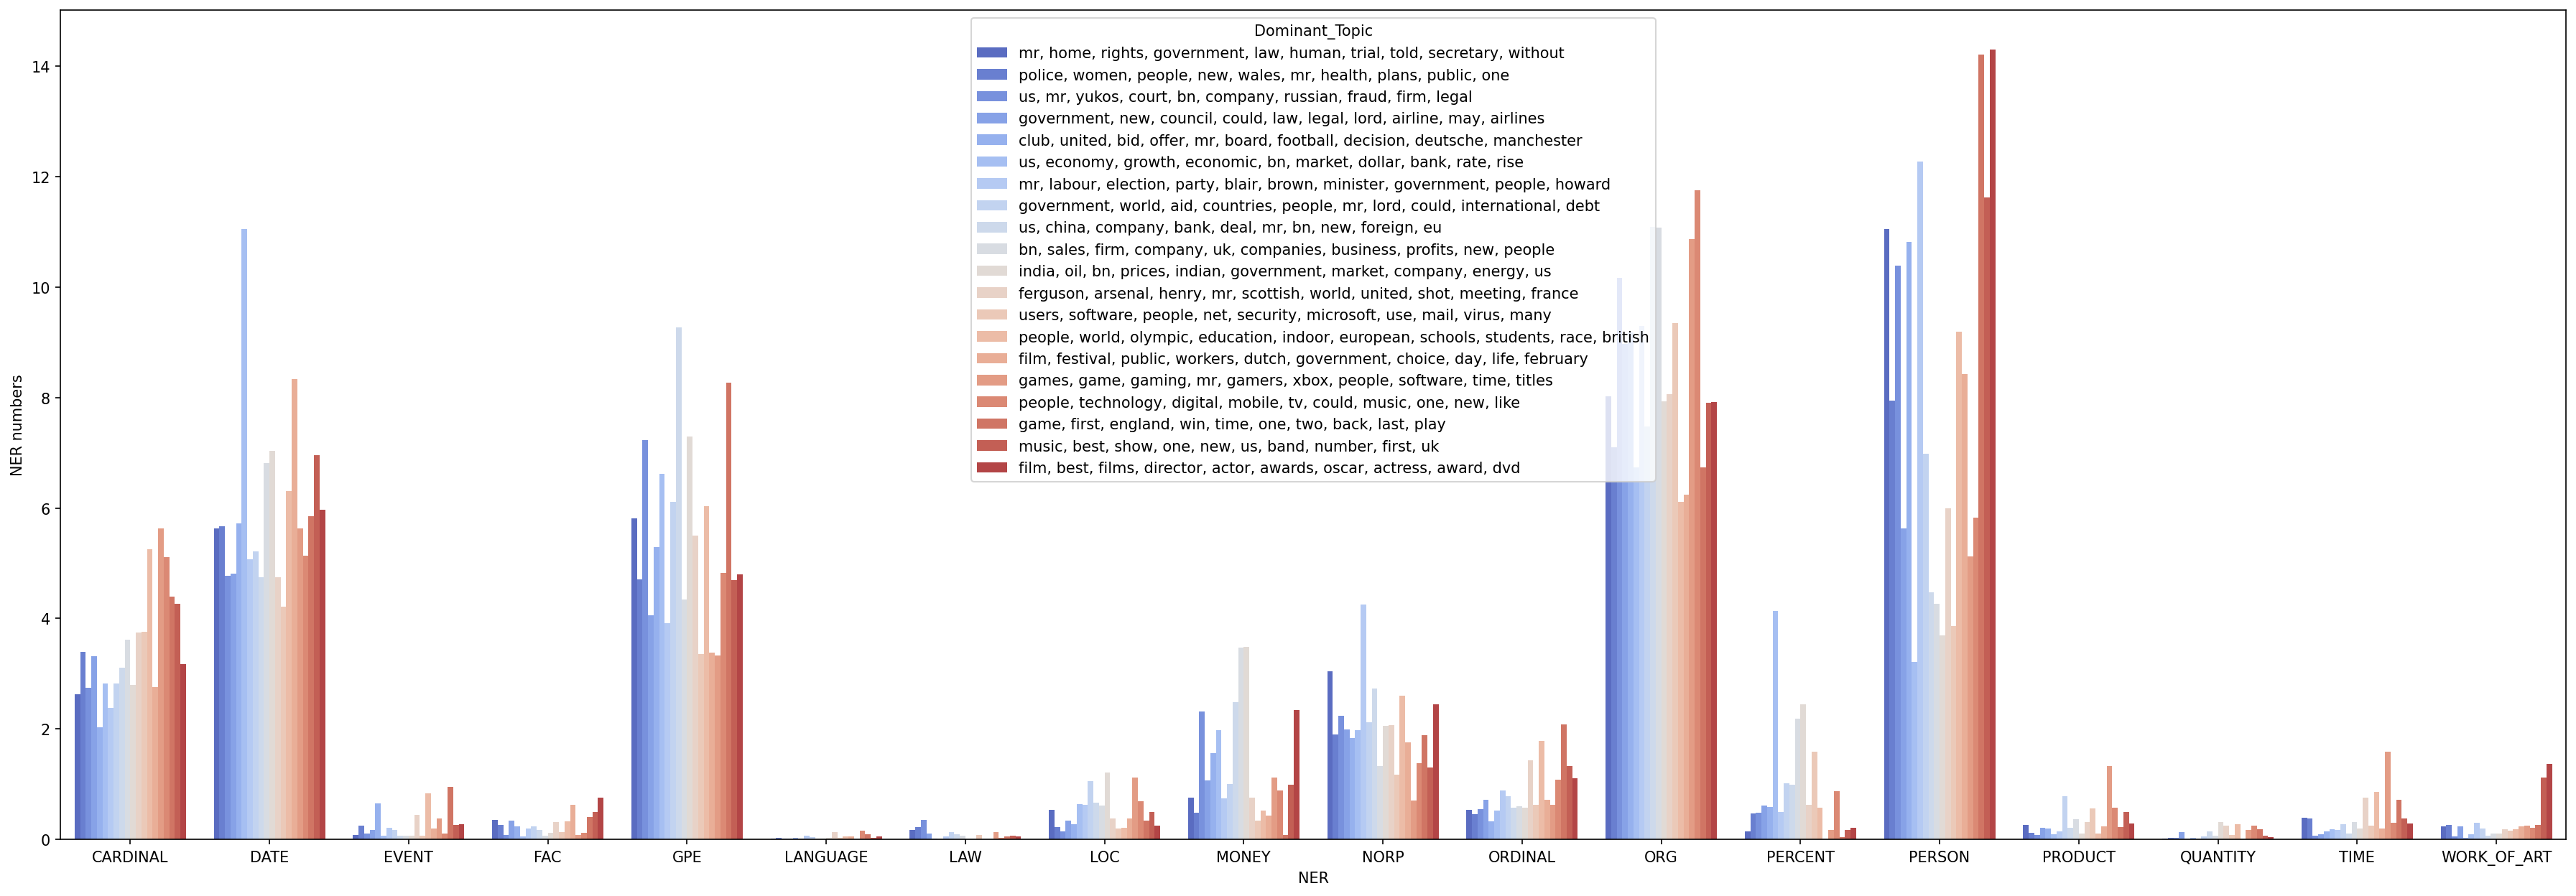

In [59]:
plt.figure(figsize=(30,10), dpi=150)
df_result = df_topic_ner_sentiment.drop(columns=['score']).melt(id_vars='Dominant_Topic', var_name='Name', value_name='Value')
df_result['Dominant_Topic'] = df_result['Dominant_Topic'].apply(lambda x:topic_list[x])
display(df_result)
sns.barplot(df_result, x='Name', y='Value', hue="Dominant_Topic", palette='coolwarm')
plt.xlabel('NER')
plt.ylabel('NER numbers')

In the graph:\
Bars are of 20 topics shown in legend, bar height shows average numbers in 18 NER.
Red color means positive sentiment, while blue means negative sentiment. \
Negative sentiment are often associated with topics including government, policy, police, fraud, economy... and NER has more number of Date, Law, NORP...\
Positive sentiment are often associated iwth topics including film, music, game technology... and NER has more work_of_art, product, time, person...
